In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define the transform to convert images to tensors
transform = transforms.ToTensor()

# Download and load the FashionMNIST dataset for training and testing
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

# Check dataset size
print(f"Training data size: {len(train_dataset)}")
print(f"Testing data size: {len(test_dataset)}")


100%|██████████| 26.4M/26.4M [00:01<00:00, 17.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 102kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 17.4MB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]

Training data size: 60000
Testing data size: 10000


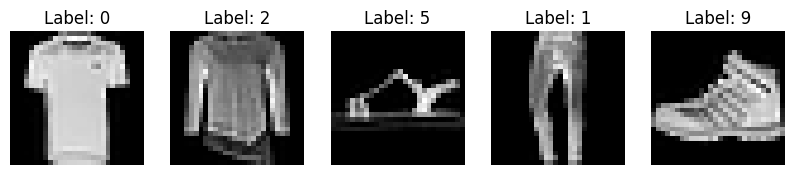

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transform
transform = transforms.ToTensor()

# Load FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)

# Select 5 random images
indices = torch.randint(0, len(train_dataset), (5,))
fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for i, idx in enumerate(indices):
    image, label = train_dataset[idx]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {label}", fontsize=12)  # Show GT/label as title
    axes[i].axis("off")

plt.show()


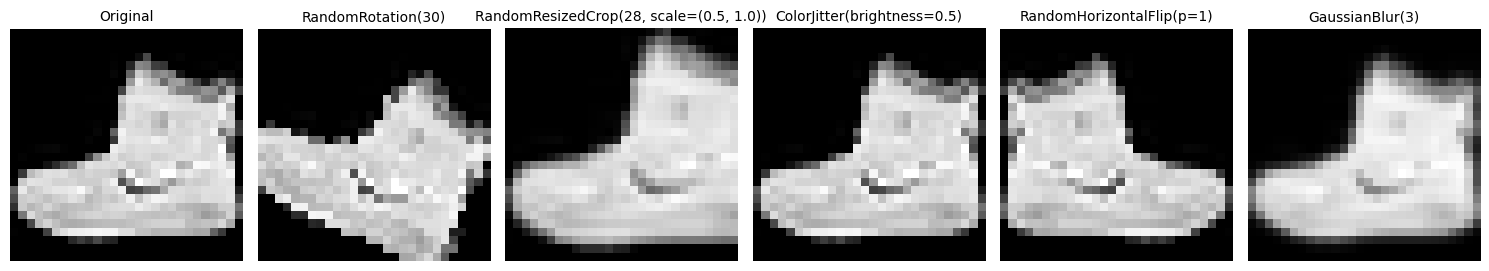

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

# Load FashionMNIST dataset
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)

# Select a random image from the dataset
image, label = train_dataset[0]  # Taking the first image
image = transforms.ToPILImage()(image)  # Convert tensor to PIL image

# Define transformations
transformations = {
    "Original": None,
    "RandomRotation(30)": transforms.RandomRotation(30),
    "RandomResizedCrop(28, scale=(0.5, 1.0))": transforms.RandomResizedCrop(28, scale=(0.5, 1.0)),
    "ColorJitter(brightness=0.5)": transforms.ColorJitter(brightness=0.5),
    "RandomHorizontalFlip(p=1)": transforms.RandomHorizontalFlip(p=1),
    "GaussianBlur(3)": transforms.GaussianBlur(3)
}

# Apply transformations and visualize
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

for i, (name, transform_fn) in enumerate(transformations.items()):
    if transform_fn:
        transformed_image = transform_fn(image)  # Apply transformation to PIL image
    else:
        transformed_image = image  # Keep original for reference
    
    axes[i].imshow(transformed_image, cmap="gray")
    axes[i].set_title(name, fontsize=10)
    axes[i].axis("off")

plt.tight_layout()
plt.show()
